# LDA Subspace

In [23]:
import numpy as np
import torch

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False



### Data Generation

In [27]:
X_1 = np.random.normal(1, 0.4, (5,20))
y_1 = np.zeros(5)
X_2 = np.random.normal(1, 1.2, (5,20))
y_2 = np.ones(5)

X = np.concatenate((X_1, X_2))
y = np.concatenate((y_1, y_2))

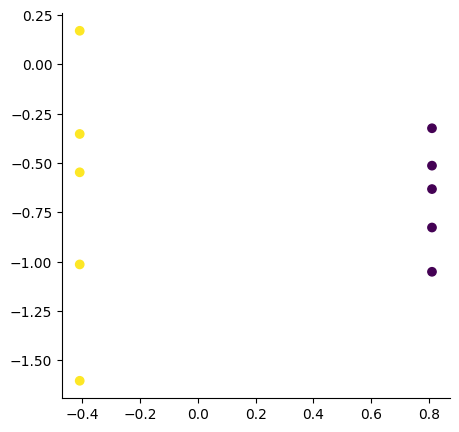

In [52]:
class LDA:

    def __init__(self, ):
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        self.eigenvals = eigenvalues[idxs]
        self.eigenvecs = eigenvectors[idxs]
        self.inverse_eigenvecs = np.linalg.inv(self.eigenvecs)

    
lda = LDA()
lda.fit(X,y)
X_trans = np.dot(X, lda.eigenvecs.T)

fig, (ax) = plt.subplots(1, figsize=(5, 5), gridspec_kw={'hspace': 0.40})
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=y)
plt.show()

X_recovered = np.dot(X_trans, lda.inverse_eigenvecs)


In [56]:
X

array([[ 1.43396390e+00,  1.59768813e+00,  8.83407840e-01,
         9.51714845e-01,  2.17524233e-01,  7.28450985e-01,
         5.48092431e-01,  3.81055812e-01,  8.23935736e-01,
         1.15241978e+00,  5.46630710e-01,  1.23414657e+00,
         1.17590356e+00,  1.34896269e+00,  1.15586679e+00,
         1.47505330e+00,  1.02436802e+00,  1.19629848e+00,
         1.52893256e+00,  9.16112053e-01],
       [ 8.88274249e-01,  1.02852939e+00,  9.33583729e-01,
         1.56389225e+00,  1.04678508e+00,  1.32483265e+00,
         4.93866106e-01,  1.03667327e+00,  8.63021308e-01,
         8.07562142e-01,  4.94317298e-01,  1.31233862e+00,
         9.96959395e-01,  7.59970343e-01,  9.00485467e-01,
         9.69651329e-01,  1.23060676e+00,  6.17466840e-01,
         1.01413110e+00,  1.14934802e+00],
       [ 1.20636532e+00,  7.22469012e-01,  7.83981715e-01,
         1.18293075e+00,  5.35171683e-01,  1.11169693e+00,
         1.33530599e+00,  1.26641045e+00,  1.43057809e+00,
         4.34135605e-01,  1.3

In [64]:
X_recovered = np.dot(X_trans, lda.inverse_eigenvecs.T)
np.round(X_recovered - X, 6).sum()

0j